In [1]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

import scipy.misc
import imageio

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("A:/Programming/Mini Project/College projects/S6 mini project/Data/Topic_modelling_study/spooky-author-identification/train.csv")
test = pd.read_csv("A:/Programming/Mini Project/College projects/S6 mini project/Data/Topic_modelling_study/spooky-author-identification/test.csv")

In [3]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
train.author.map(z).unique()

array(['Edgar Allen Poe', 'HP Lovecraft', 'Mary Shelley'], dtype=object)

In [5]:
train.author.value_counts()

author
EAP    7900
MWS    6044
HPL    5635
Name: count, dtype: int64

In [6]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
#             text='Text entries attributed to Author'
            )
       ]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [7]:
#Finding top 50 uncleaned words in the dataset

In [8]:
train['text'].str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,851,852,853,854,855,856,857,858,859,860
0,This,"process,","however,",afforded,me,no,means,of,ascertaining,the,...,None,None,None,None,None,None,None,None,None,None
1,It,never,once,occurred,to,me,that,the,fumbling,might,...,None,None,None,None,None,None,None,None,None,None
2,In,his,left,hand,was,a,gold,snuff,"box,",from,...,None,None,None,None,None,None,None,None,None,None
3,How,lovely,is,spring,As,we,looked,from,Windsor,Terrace,...,None,None,None,None,None,None,None,None,None,None
4,Finding,nothing,"else,",not,even,"gold,",the,Superintendent,abandoned,his,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19574,I,could,have,"fancied,",while,I,looked,at,"it,",that,...,None,None,None,None,None,None,None,None,None,None
19575,The,lids,clenched,themselves,together,as,if,in,a,spasm.,...,None,None,None,None,None,None,None,None,None,None
19576,Mais,il,faut,agir,that,is,to,"say,",a,Frenchman,...,None,None,None,None,None,None,None,None,None,None
19577,For,an,item,of,news,like,"this,",it,strikes,us,...,None,None,None,None,None,None,None,None,None,None


In [9]:
train.shape

(19579, 3)

In [10]:
max_words = 0
row = 0
for i in range(train.shape[0]):
    if len(train['text'][i].split()) > max_words:
        print("before: ", max_words)
        print("len(train['text'][%d])", len(train['text'][i].split()))
        max_words = len(train['text'][i].split())
        row = i
        print("after: ", max_words)
print(max_words, i)

before:  0
len(train['text'][%d]) 41
after:  41
before:  41
len(train['text'][%d]) 83
after:  83
before:  83
len(train['text'][%d]) 88
after:  88
before:  88
len(train['text'][%d]) 93
after:  93
before:  93
len(train['text'][%d]) 104
after:  104
before:  104
len(train['text'][%d]) 127
after:  127
before:  127
len(train['text'][%d]) 148
after:  148
before:  148
len(train['text'][%d]) 186
after:  186
before:  186
len(train['text'][%d]) 377
after:  377
before:  377
len(train['text'][%d]) 861
after:  861
861 19578


In [11]:
train['text'][6]

'The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall.'

In [12]:
len(train['text'][6].split())

21

In [13]:
part = train['text'].str.split(expand=True).unstack()

In [14]:
all_words = part.value_counts()

In [15]:
all_words.index.values

array(['the', 'of', 'and', ..., "buildin's", 'useless;', 'reduced?'],
      dtype=object)

In [16]:
data = [go.Bar(
            x = all_words.index.values[:50],
            y = all_words.values[:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [17]:
eap = train[train.author == 'EAP']['text'].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [18]:
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

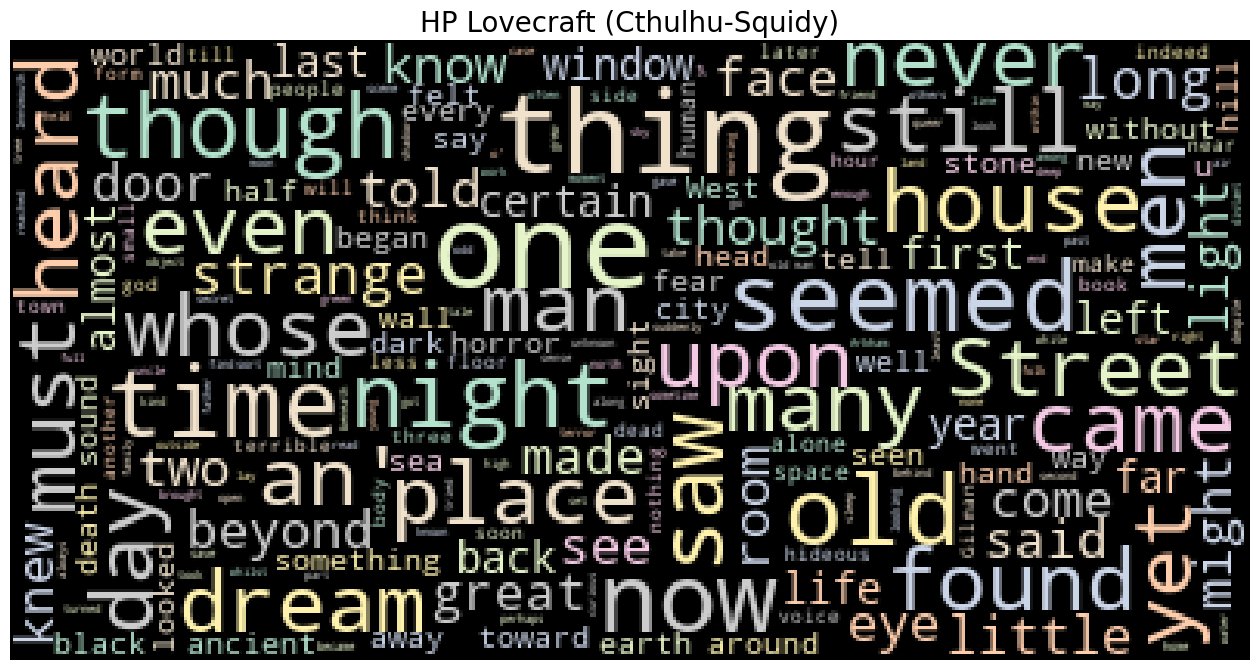

In [19]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(hpl))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)

# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=1)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

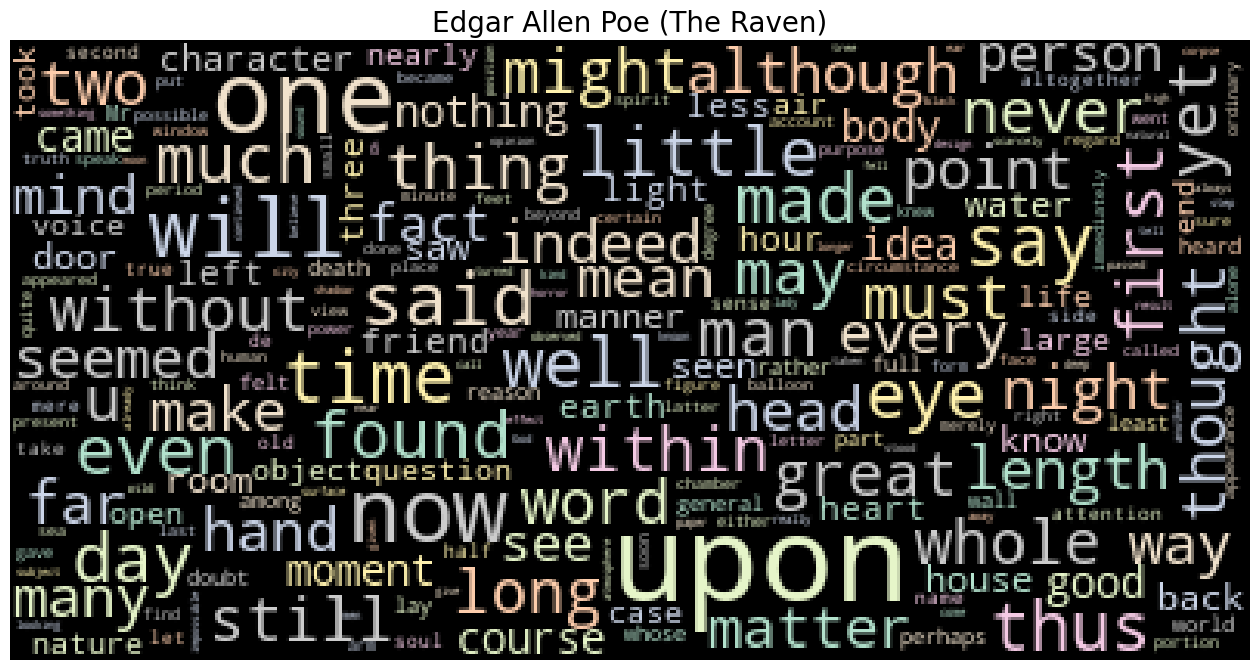

In [20]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(eap))
plt.title("Edgar Allen Poe (The Raven)", fontsize=20)

# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=1)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

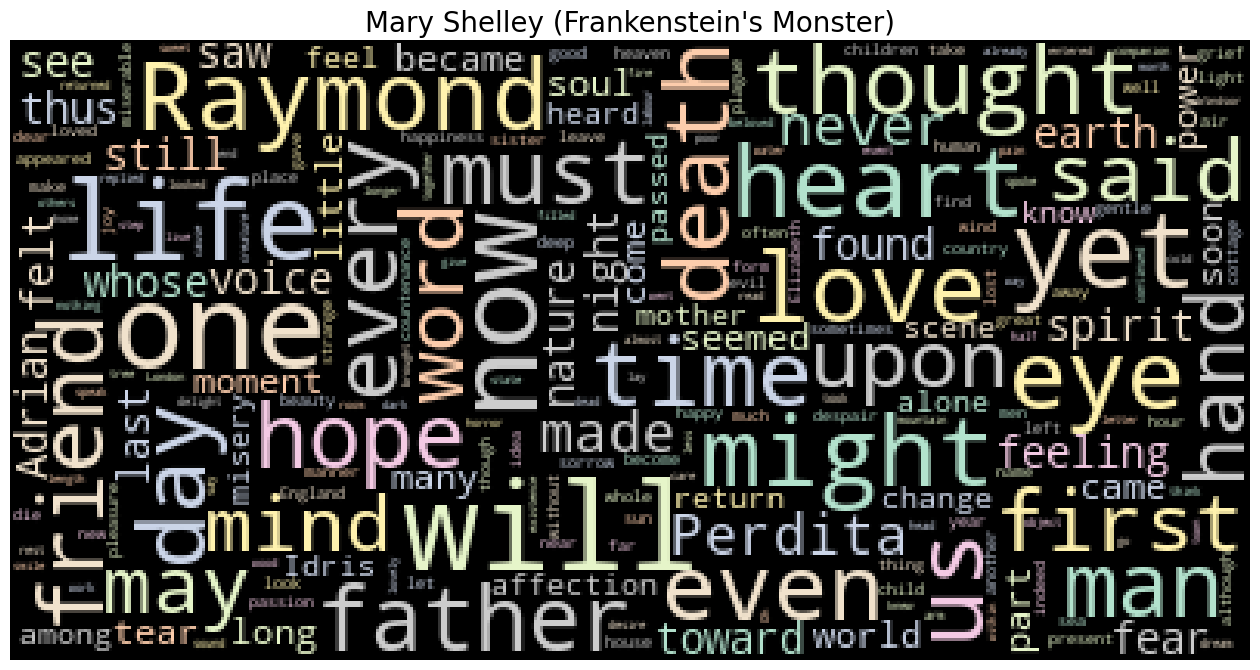

In [21]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(mws))
plt.title("Mary Shelley (Frankenstein's Monster)", fontsize=20)

# plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=1)
plt.axis('off')

In [22]:
import nltk

In [23]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [28]:
first_text = train.text.values[0]
first_text_line = nltk.word_tokenize(first_text)
print(first_text_line)
stopwords = nltk.corpus.stopwords.words('english')
print(len(stopwords))
first_text_line_cleaned = [words for words in first_text_line if words.lower() not in stopwords]
print("No of words in uncleaned line: ", len(first_text_line))
print("No of words in cleaned line: ", len(first_text_line_cleaned))

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']
179
No of words in uncleaned line:  48
No of words in cleaned line:  28


In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [31]:
stemmer = nltk.stem.PorterStemmer()

In [36]:
print(stemmer.stem("Running"))
print(stemmer.stem("Ran"))
print(stemmer.stem("Runs"))

run
ran
run


In [40]:
stemmer.stem("leaves")

'leav'

In [38]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [39]:
lemm.lemmatize("leaves")

'leaf'

In [42]:
vectorizer = CountVectorizer(min_df=0)

In [44]:
sentance = [
            'Hi my name is Abhinav',
            'Hi my name is Krishnan', 
            'Hello everyone, my full name is Abhinav Krishnan'
           ]
sentence_transformed = vectorizer.fit_transform(sentance)

In [48]:
print(vectorizer.get_feature_names())
print(sentence_transformed.toarray())

['abhinav', 'everyone', 'full', 'hello', 'hi', 'is', 'krishnan', 'my', 'name']
[[1 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1]]


C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [49]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [50]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [51]:
text = list(train.text.values)
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [52]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]
layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')


In [53]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [54]:
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=11, random_state=0)

In [55]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:mean night fact young return great human looking wonder countenance difficulty greater wife finally set possessed regard struck perceived act society law health key fearful mr exceedingly evidence carried home write lady various recall accident force poet neck conduct investigation

Topic #1:death love raymond hope heart word child went time good man ground evil long misery replied filled passion bed till happiness memory heavy region year escape spirit grief visit doe story beauty die plague making influence thou letter appeared power

Topic #2:left let hand said took say little length body air secret gave right having great arm thousand character minute foot true self gentleman pleasure box clock discovered point sought pain nearly case best mere course manner balloon fear head going

Topic #3:called sense table suddenly sympathy machine sens unusual labour thrown mist solution suppose specie movement whispered urged frequent wine hour appears ring tu

In [ ]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

import scipy.misc
import imageio

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv("A:/Programming/Mini Project/College projects/S6 mini project/Data/Topic_modelling_study/spooky-author-identification/train.csv")
test = pd.read_csv("A:/Programming/Mini Project/College projects/S6 mini project/Data/Topic_modelling_study/spooky-author-identification/test.csv")

In [ ]:
train.head()

In [ ]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
train.author.map(z).unique()

In [ ]:
train.author.value_counts()

In [ ]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
#             text='Text entries attributed to Author'
            )
       ]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [ ]:
train['text'].str.split(expand=True)

In [ ]:
train.shape

In [ ]:
max_words = 0
row = 0
for i in range(train.shape[0]):
    if len(train['text'][i].split()) > max_words:
        print("before: ", max_words)
        print("len(train['text'][%d])", len(train['text'][i].split()))
        max_words = len(train['text'][i].split())
        row = i
        print("after: ", max_words)
print(max_words, i)

In [ ]:
train['text'][6]

In [ ]:
len(train['text'][6].split())

In [ ]:
part = train['text'].str.split(expand=True).unstack()

In [ ]:
all_words = part.value_counts()

In [ ]:
all_words.index.values